In [26]:
from google.cloud import bigquery
from openai import AzureOpenAI
import pandas as pd

client = bigquery.Client()

project_id = 'ingka-online-analytics-prod'
dataset_id = 'app_data_v2'
table_id = 'app_surveys'

table_ref = f'{project_id}.{dataset_id}.{table_id}'

query = f"""
    SELECT *
    FROM `{table_ref}`
"""

query_job = client.query(query)

df = query_job.to_dataframe()

# Basic analysis
print(df.head())

/Users/davide.zanutto1/Desktop/app-reviews-data/app-reviews-data/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


         date operating_system market  market_name language app_version  \
0  2022-05-12          Android     AT      Austria       DE    03.16.01   
1  2022-01-06          Android     RU       Russia       RU    03.08.00   
2  2022-01-07              iOS     CA       Canada       EN    03.08.02   
3  2022-01-07              iOS     RU       Russia       RU    03.08.02   
4  2022-01-07              iOS     KR  South Korea       KO    03.08.02   

  unique_response_id store_no  rating                            survey_id  \
0               None     None       5  scanshop-order-confirmation-offline   
1               None     None       2                      checkout-survey   
2               None     None       3                      checkout-survey   
3               None     None       5                      checkout-survey   
4               None     None       4                      checkout-survey   

                                   answer_translated  \
0                       

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# General statistics of numerical columns
print("Rating statistics:\n", df.describe())

Missing values:
 date                             0
operating_system                 0
market                           0
market_name                      0
language                         0
app_version                      0
unique_response_id         1738735
store_no                   1800687
rating                           0
survey_id                    11759
answer_translated          9509443
question_local_language    9525701
answer_local_language      9509443
last_update                      0
dtype: int64
Rating statistics:
            rating
count  10471288.0
mean     4.693583
std      0.731598
min           0.0
25%           5.0
50%           5.0
75%           5.0
max           5.0


/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2608546890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")


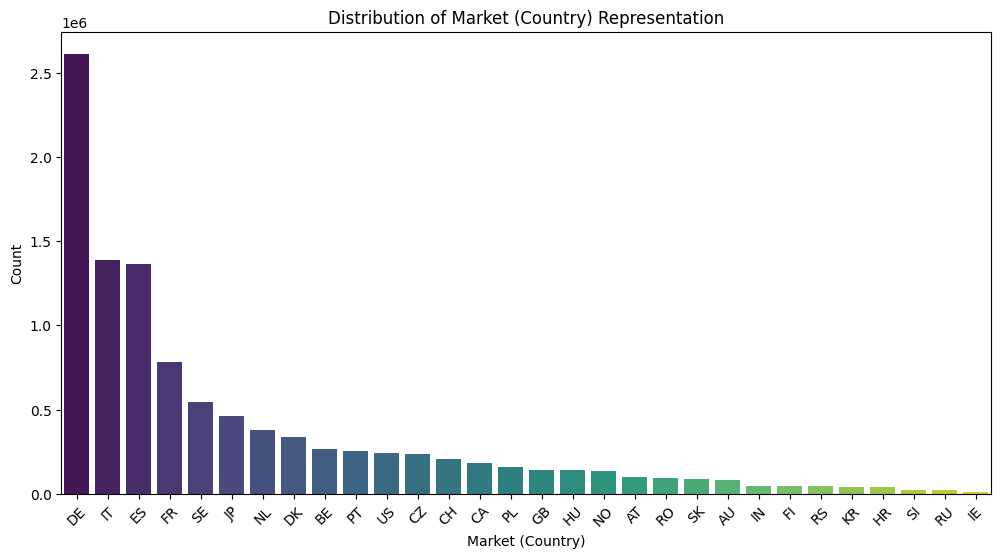

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences for each market
market_counts = df['market'].value_counts()

# Plotting the distribution of markets
plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")
plt.title("Distribution of Market (Country) Representation")
plt.xlabel("Market (Country)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2756992990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_market.index, y=avg_rating_market.values, palette="plasma")


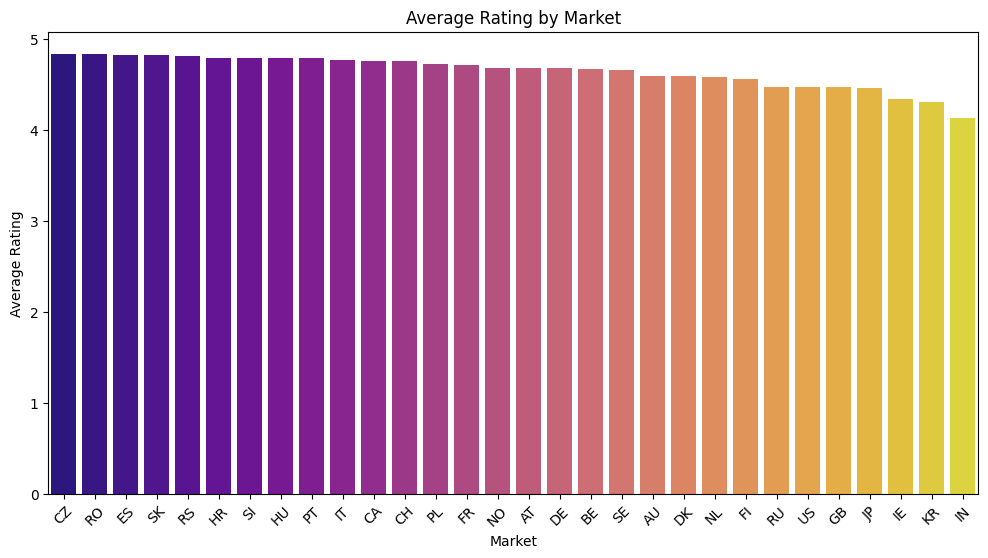

In [29]:
# Calculate average rating by market
avg_rating_market = df.groupby("market")["rating"].mean().sort_values(ascending=False)

# Plot average rating by market
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_market.index, y=avg_rating_market.values, palette="plasma")
plt.title("Average Rating by Market")
plt.xlabel("Market")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/141943578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_os.index, y=avg_rating_os.values, palette="cool")


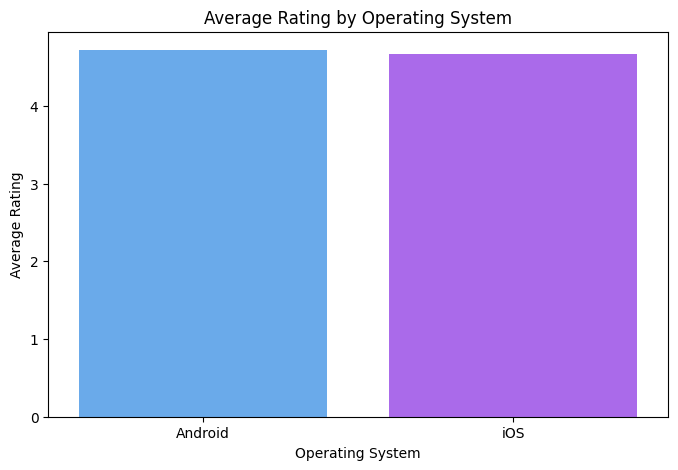

In [30]:
# Calculate average rating by operating system
avg_rating_os = df.groupby("operating_system")["rating"].mean().sort_values(ascending=False)

# Plot average rating by operating system
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_os.index, y=avg_rating_os.values, palette="cool")
plt.title("Average Rating by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Rating")
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2992080076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")


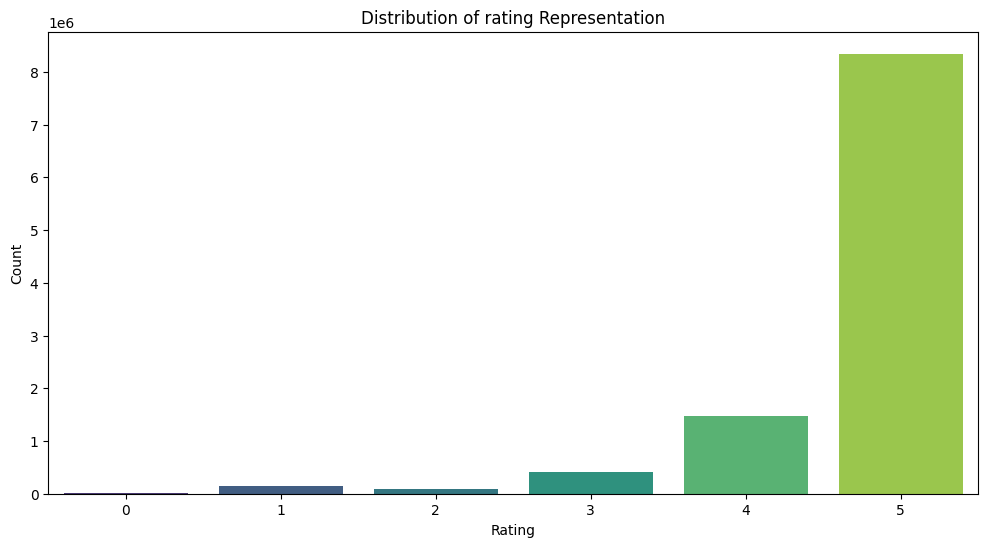

In [31]:
market_counts = df['rating'].value_counts()

# Plotting the distribution of markets
plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")
plt.title("Distribution of rating Representation")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/4118130928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_counts.index, y=version_counts.values, palette="magma")


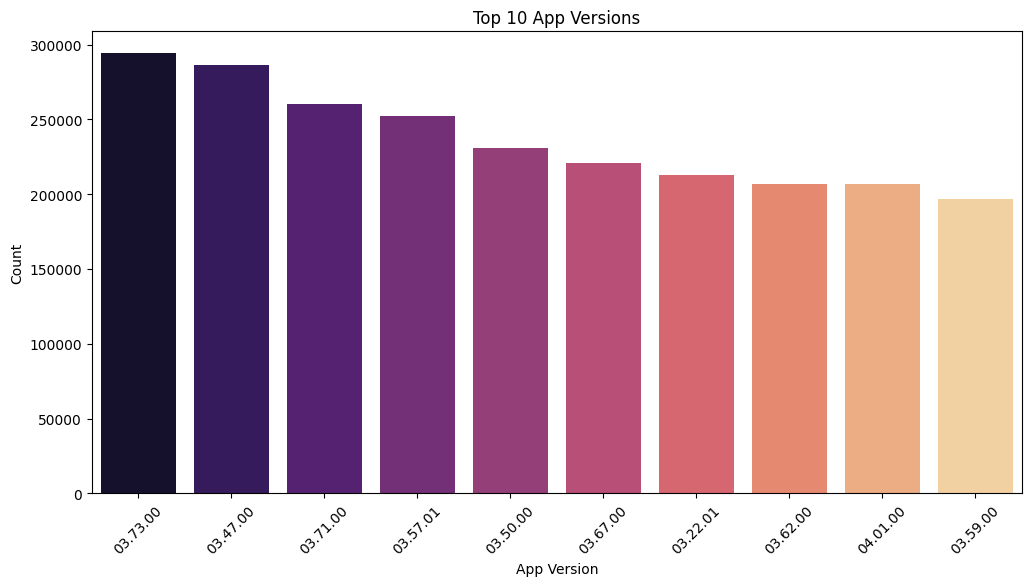

In [32]:
# Count of records by app version
version_counts = df['app_version'].value_counts().nlargest(10)

# Plotting app version usage
plt.figure(figsize=(12, 6))
sns.barplot(x=version_counts.index, y=version_counts.values, palette="magma")
plt.title("Top 10 App Versions")
plt.xlabel("App Version")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/1652264089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="Set2")


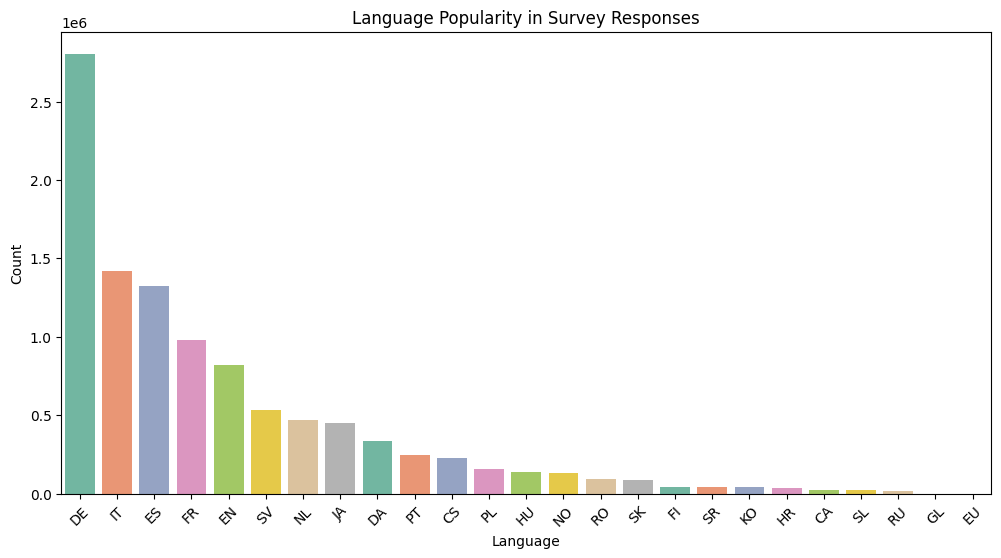

In [33]:
# Count of responses in each language
language_counts = df['language'].value_counts()

# Plotting language popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="Set2")
plt.title("Language Popularity in Survey Responses")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

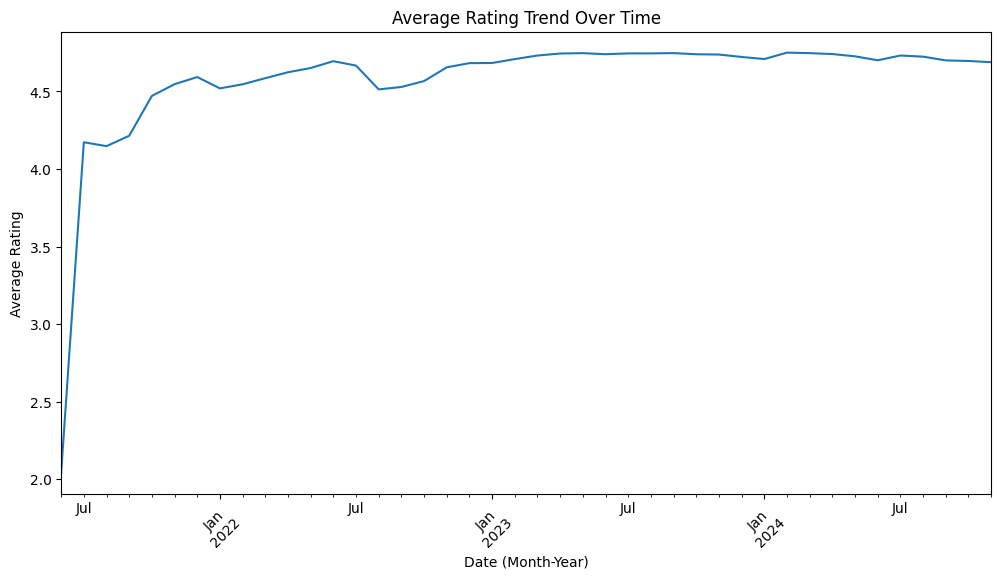

In [34]:
# Convert date column to datetime format for time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Group by month-year and calculate the average rating
df['month_year'] = df['date'].dt.to_period('M')
monthly_rating = df.groupby('month_year')['rating'].mean()

# Plot monthly average rating trend
plt.figure(figsize=(12, 6))
monthly_rating.plot()
plt.title("Average Rating Trend Over Time")
plt.xlabel("Date (Month-Year)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

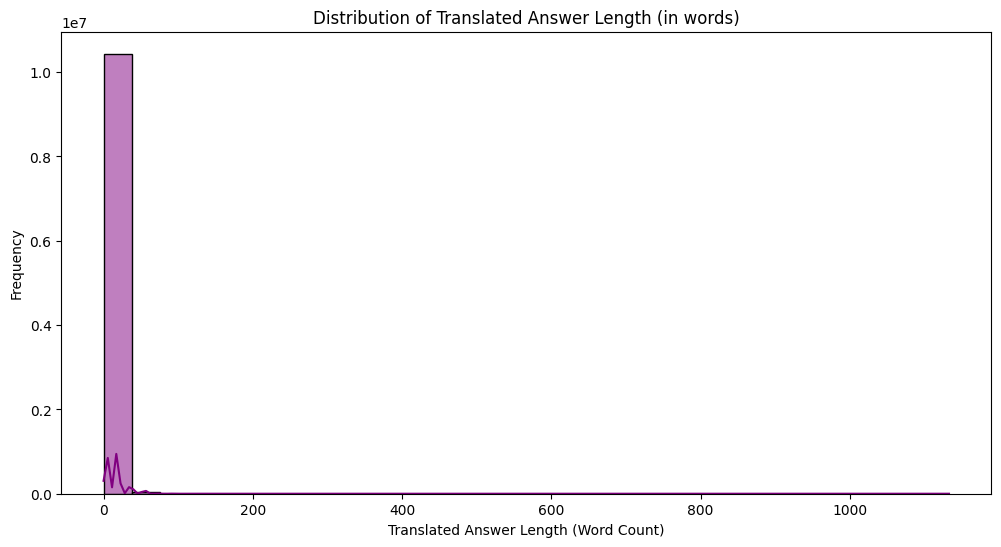

In [35]:
df['translated_answer_length'] = df['answer_translated'].apply(lambda x: len(str(x).split()))

# Display the distribution of answer length
plt.figure(figsize=(12, 6))
sns.histplot(df['translated_answer_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Translated Answer Length (in words)")
plt.xlabel("Translated Answer Length (Word Count)")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Check for mismatches by grouping
market_language_pairs = df.groupby(['market', 'language']).size().reset_index(name='count')

print("Market-Language Pairs (Check for Mismatches):")
print(market_language_pairs)

Market-Language Pairs (Check for Mismatches):
   market language    count
0      AT       DE    95243
1      AT       EN     1886
2      AU       EN    84027
3      BE       EN    11391
4      BE       FR   126576
5      BE       NL   129212
6      CA       EN   166470
7      CA       FR    15182
8      CH       DE   100930
9      CH       EN    14453
10     CH       FR    58006
11     CH       IT    30335
12     CZ       CS   227044
13     CZ       EN    10051
14     DE       DE  2608086
15     DE       EN     4675
16     DK       DA   339067
17     ES       CA    23004
18     ES       EN    12139
19     ES       ES  1326570
20     ES       EU      145
21     ES       GL      838
22     FI       EN      293
23     FI       FI    45798
24     FR       FR   782231
25     GB       EN   143669
26     HR       HR    38036
27     HU       HU   139996
28     IE       EN    11828
29     IN       EN    48239
30     IT       IT  1387321
31     JP       EN     8222
32     JP       JA   451897
33